In [1]:
import pinocchio as pin
import numpy as np

In [64]:
model = pin.Model()

mass = 2.0  # kg
length = 1.0 # meters

joint_id = model.addJoint(0, 
                          pin.JointModelRX(), 
                          pin.SE3(pin.utils.rotate('x', np.pi/2), np.zeros(3)), 
                          "pendulum_joint"
            )

inertia = pin.Inertia(mass, np.array([0., length / 2, 0.]), np.zeros((3, 3)))
model.appendBodyToJoint(joint_id, 
                        inertia,
                        pin.SE3.Identity()
        )

model.gravity.linear[2] = -9.81  # Gravity in the -Z direction

In [65]:
def simulate_inverted_pendulum(model, initial_angle, simulation_time, dt):
    # Create data for the model
    data = model.createData()

    # Set initial state (angle and angular velocity)
    # q is the joint configuration (angle in radians)
    # v is the joint velocity (angular velocity in rad/s)
    q = pin.utils.zero(model.nq)
    q[0] = initial_angle  # Initial angle in radians (e.g., slightly off vertical)
    v = pin.utils.zero(model.nv)

    # Store trajectory data
    trajectory = []
    times = []

    # Simulation loop
    num_steps = int(simulation_time / dt)
    for i in range(num_steps):
        trajectory.append(q.copy())
        times.append(i * dt)

        # Compute the forward dynamics (acceleration from state and torque)
        # For a simple pendulum, we don't apply external torques, so tau is zero.
        tau = pin.utils.zero(model.nv)
        a = pin.aba(model, data, q, v, tau)

        # Integrate the state using Euler integration (simple, but can use more advanced integrators)
        v += a * dt
        q = pin.integrate(model, q, v * dt)

        # Optional: Print current state for debugging
        print(f"Time: {times[-1]:.3f}s, Angle: {q[0]:.3f} rad, Angular Vel: {v[0]:.3f} rad/s")

    return trajectory, times

In [66]:
def visualize_inverted_pendulum(model, trajectory, dt):
    try:
        import gepetto.gui
        import time
        
        # Create a robot wrapper for visualization
        robot = pin.RobotWrapper(model, visual_model=model, collision_model=model)
        
        # Initialize the viewer
        gui = robot.initViewer(loadModels=True)
        gui.setCameraTransform(np.array([
            0.5, -3.0, 0.5,  # x, y, z position
            0.5, 0.5, 0.5, 0.5 # quaternion (looking towards the origin)
        ]))

        # Display the robot at the initial configuration
        robot.display(trajectory[0])
        
        print("Starting visualization...")
        for q_viz in trajectory:
            robot.display(q_viz)
            time.sleep(dt)
        print("Visualization finished.")

    except ImportError:
        print("Gepetto-gui not found. Skipping visualization.")
    except Exception as e:
        print(f"Error during visualization: {e}. Skipping visualization.")

Inverted Pendulum Model created successfully.
Number of joints: 1
Simulating for 10.0 seconds with a time step of 0.01...
Time: 0.000s, Angle: 1.473 rad, Angular Vel: 0.195 rad/s
Time: 0.010s, Angle: 1.477 rad, Angular Vel: 0.390 rad/s
Time: 0.020s, Angle: 1.483 rad, Angular Vel: 0.586 rad/s
Time: 0.030s, Angle: 1.490 rad, Angular Vel: 0.781 rad/s
Time: 0.040s, Angle: 1.500 rad, Angular Vel: 0.977 rad/s
Time: 0.050s, Angle: 1.512 rad, Angular Vel: 1.173 rad/s
Time: 0.060s, Angle: 1.526 rad, Angular Vel: 1.368 rad/s
Time: 0.070s, Angle: 1.541 rad, Angular Vel: 1.564 rad/s
Time: 0.080s, Angle: 1.559 rad, Angular Vel: 1.760 rad/s
Time: 0.090s, Angle: 1.578 rad, Angular Vel: 1.957 rad/s
Time: 0.100s, Angle: 1.600 rad, Angular Vel: 2.153 rad/s
Time: 0.110s, Angle: 1.623 rad, Angular Vel: 2.349 rad/s
Time: 0.120s, Angle: 1.649 rad, Angular Vel: 2.545 rad/s
Time: 0.130s, Angle: 1.676 rad, Angular Vel: 2.741 rad/s
Time: 0.140s, Angle: 1.706 rad, Angular Vel: 2.936 rad/s
Time: 0.150s, Angle: 1.

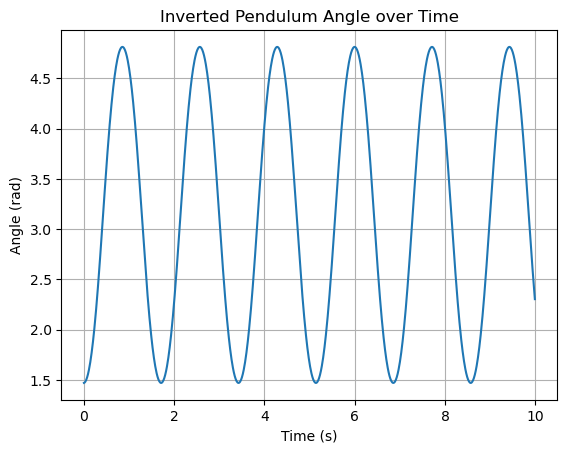

In [69]:
# Create the inverted pendulum model
pendulum_model = model
print("Inverted Pendulum Model created successfully.")
print(f"Number of joints: {pendulum_model.nq}")

# Simulation parameters
initial_angle_rad = np.pi / 2 - .1
simulation_duration = 10.0      # seconds
time_step = 0.01             # seconds

# Simulate the pendulum
print(f"Simulating for {simulation_duration} seconds with a time step of {time_step}...")
pendulum_trajectory, simulation_times = simulate_inverted_pendulum(
    pendulum_model, initial_angle_rad, simulation_duration, time_step
)
print("Simulation complete.")

# Visualize the simulation
visualize_inverted_pendulum(pendulum_model, pendulum_trajectory, time_step)

# You can also plot the results if you have matplotlib
try:
    import matplotlib.pyplot as plt
    angles = [q[0] for q in pendulum_trajectory]
    plt.plot(simulation_times, angles)
    plt.title("Inverted Pendulum Angle over Time")
    plt.xlabel("Time (s)")
    plt.ylabel("Angle (rad)")
    plt.grid(True)
    plt.show()
except ImportError:
    print("Matplotlib not found. Skipping plotting.")